# **CLASSIFICATION MODEL**

In [ ]:
from matplotlib import pyplot
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
import matplotlib
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

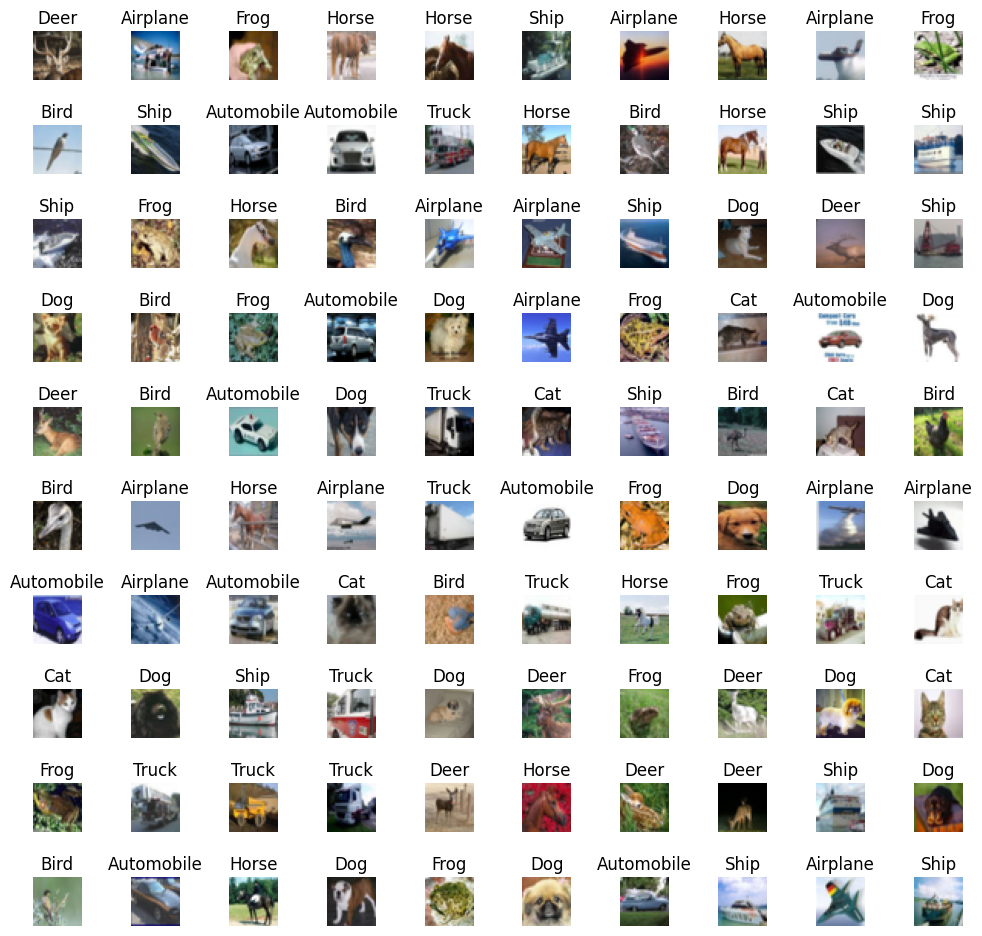

In [ ]:
num_row = 10
num_col = 10
showImages(num_row,num_col,X =x_train,Y = y_train)

In [ ]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

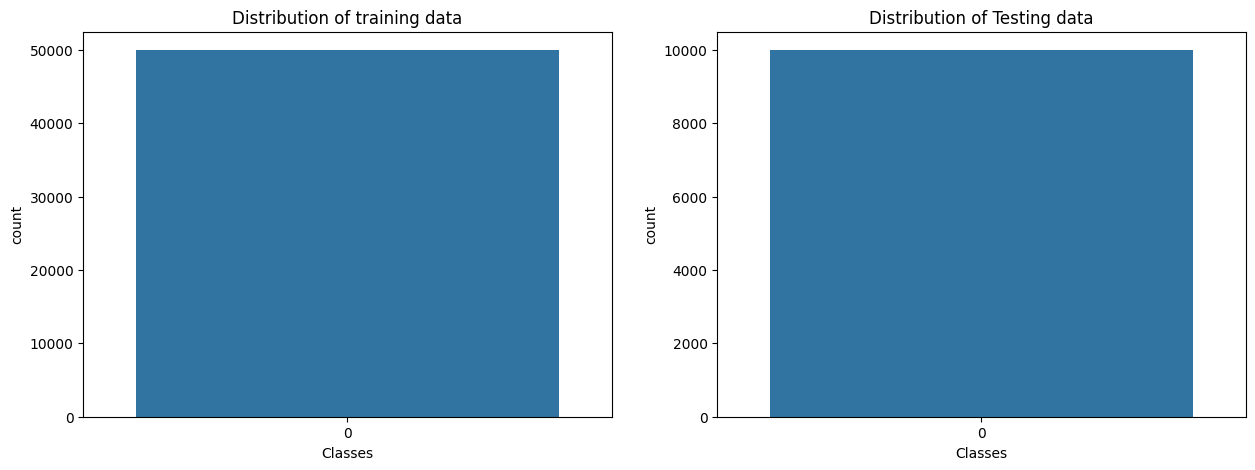

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# **Text Classification Using RNN**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import math
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf;
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')
df.shape

(101, 7)

In [ ]:
df.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

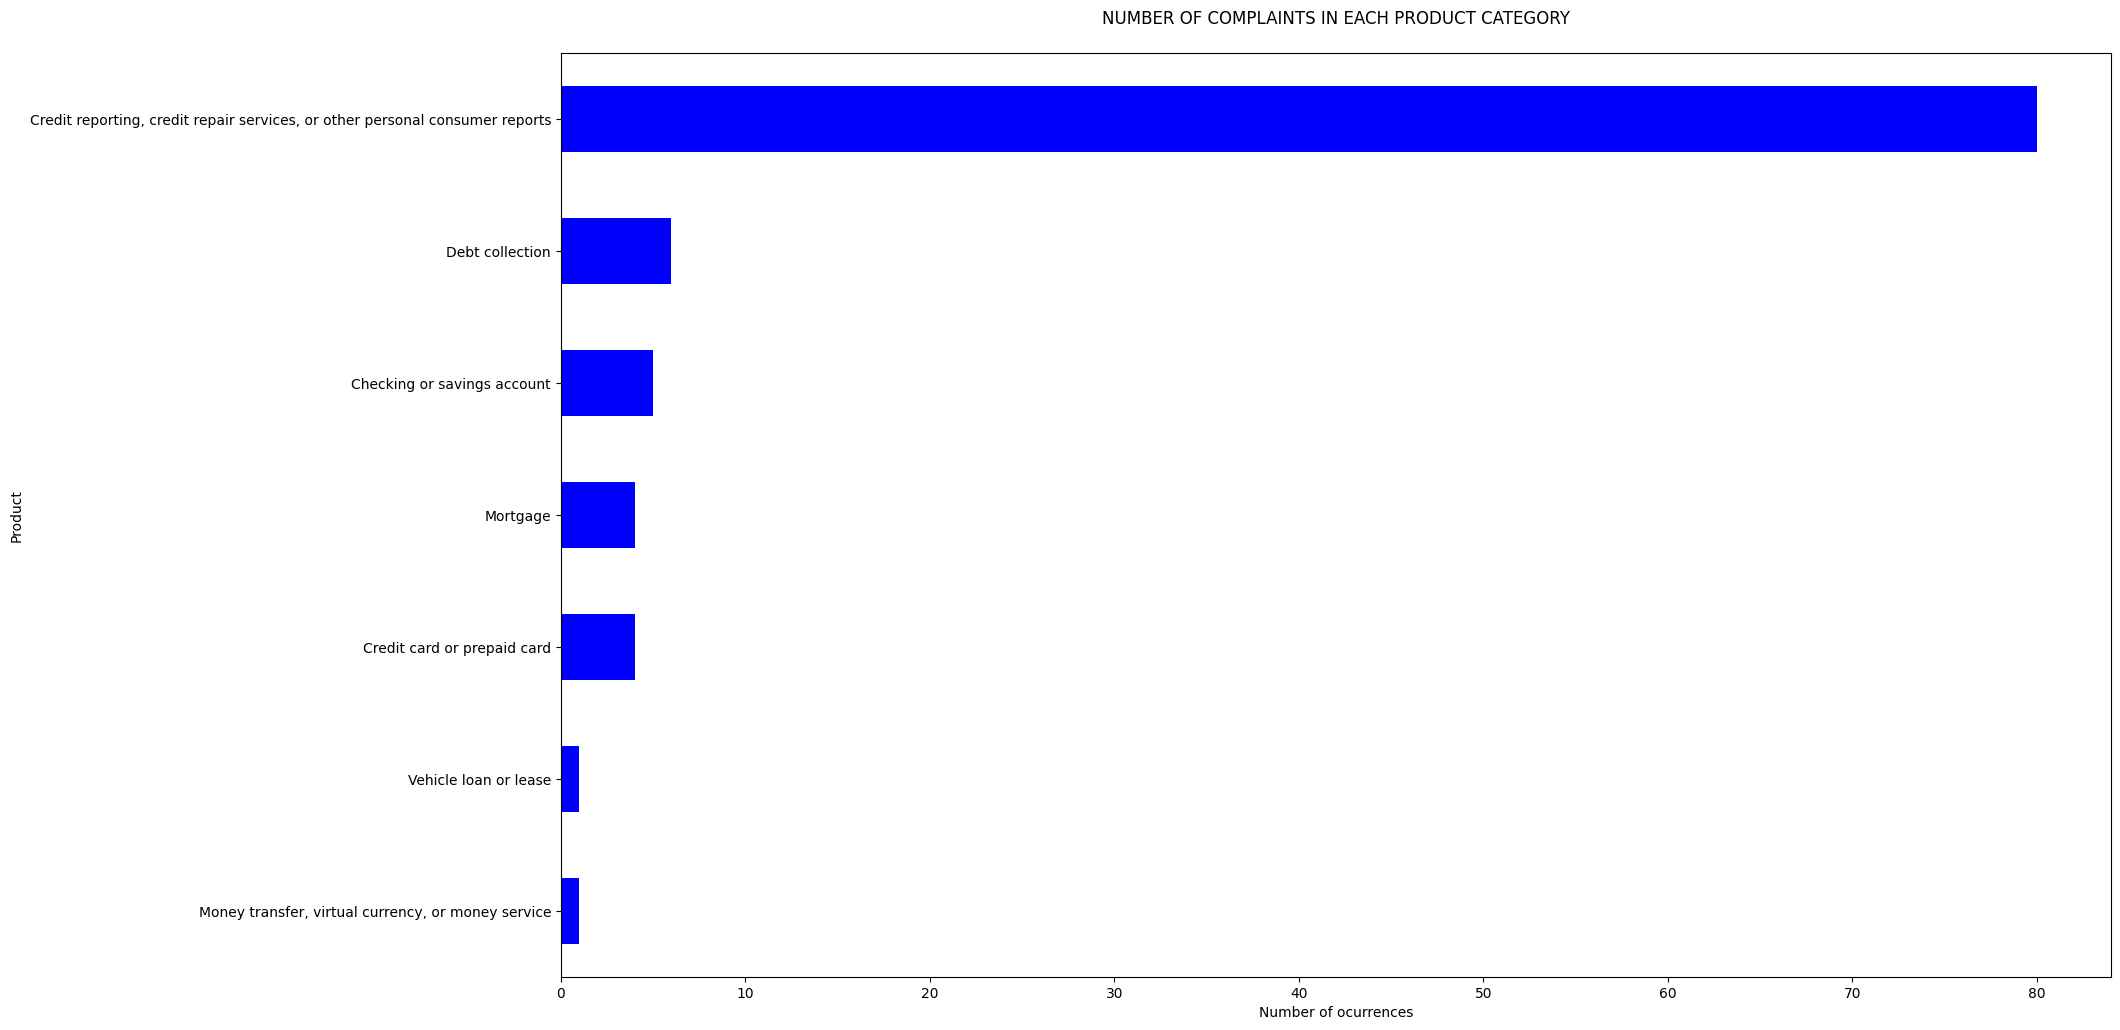

In [ ]:
fig = plt.figure(figsize=(20,12))
df.groupby(['Product'])['Sub-product'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [ ]:
df[df['Date received'] == 'Product']['Sub-product'].value_counts()

Series([], Name: Sub-product, dtype: int64)

In [ ]:
df[df['Date received'] == 'Product']['Sub-product'].value_counts().head(10)

Series([], Name: Sub-product, dtype: int64)

In [ ]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values,
                          marker=dict(colors=colors,
                         line=dict(color='#000000', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Credit reporting, credit repair services, or other personal consumer reports    79.21
Debt collection                                                                  5.94
Checking or savings account                                                      4.95
Mortgage                                                                         3.96
Credit card or prepaid card                                                      3.96
Vehicle loan or lease                                                            0.99
Money transfer, virtual currency, or money service                               0.99
Name: Product, dtype: float64


In [ ]:
df[df['Date received'] == 'Product']['Sub-product'].value_counts()

Series([], Name: Sub-product, dtype: int64)

In [ ]:
len(df[df['Product'] == 'Yes'])/len(df['Product'])

0.0

In [ ]:
df[(df['Product'] == 'Yes') & (df['Product'] == 'Yes')]['Date received'].value_counts().head(10)

Series([], Name: Date received, dtype: int64)

Text(0.5, 0, 'No of Complaints')

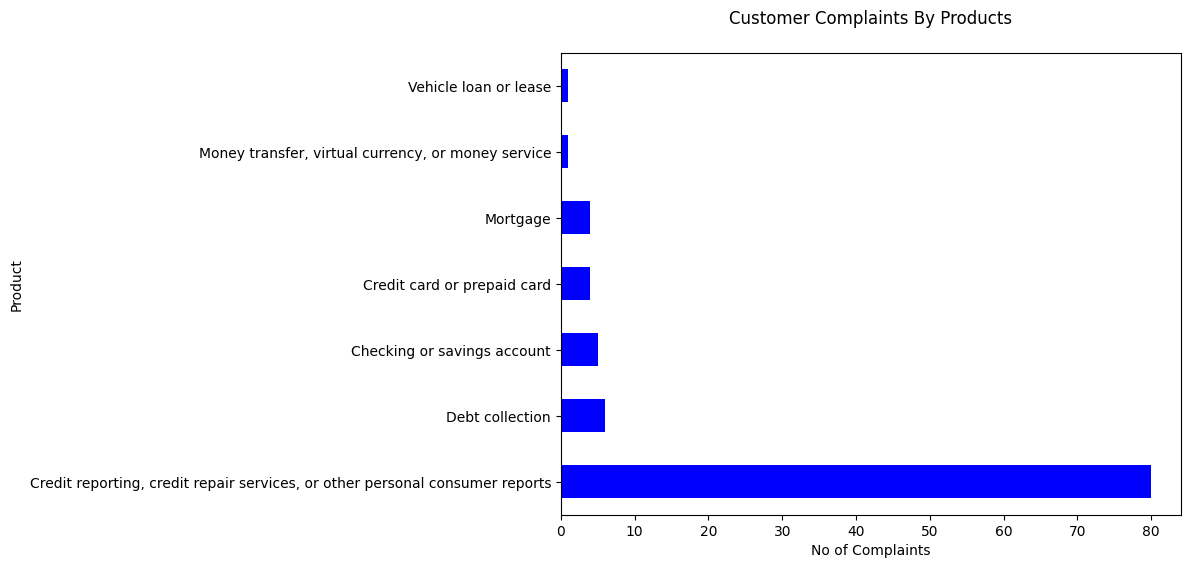

In [ ]:
Complaints_by_products = df.groupby(['Product'])['Issue'].count().sort_values(ascending=False)
fig = plt.figure(figsize=(8,6))
Complaints_by_products.plot.barh(ylim=0,color='blue',title= 'Customer Complaints By Products\n')
plt.xlabel('No of Complaints')

In [ ]:
df[df['Product'] == 'Mortgage']['Issue'].value_counts()

Trouble during payment process    2
Struggling to pay mortgage        1
Closing on a mortgage             1
Name: Issue, dtype: int64

In [ ]:
df1 = df[['Product', 'Consumer complaint narrative']].copy()
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]
df1.columns = ['Product', 'Consumer_complaint']

df1.shape

(3, 2)

In [ ]:
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

3.0

In [ ]:
pd.DataFrame(df.Product.unique())

0
0                                           Mortgage
1  Credit reporting, credit repair services, or o...
2                                    Debt collection
3                        Credit card or prepaid card
4                              Vehicle loan or lease
5  Money transfer, virtual currency, or money ser...
6                        Checking or savings account

In [ ]:

df1['Date received'] = df1['Product'].factorize()[0]
category_id_df = df1[['Product', 'Date received']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Date received', 'Product']].values)

# New dataframe
df1.head()

Product  \
18   Credit reporting, credit repair services, or o...   
85                                            Mortgage   
100  Credit reporting, credit repair services, or o...   

                                    Consumer_complaint  Date received  
18   I have filed multiple disputes with this compa...              0  
85   I have fully paid up my mortgage dues and Sele...              1  
100  My name is XXXX XXXX this complaint is not mad...              0

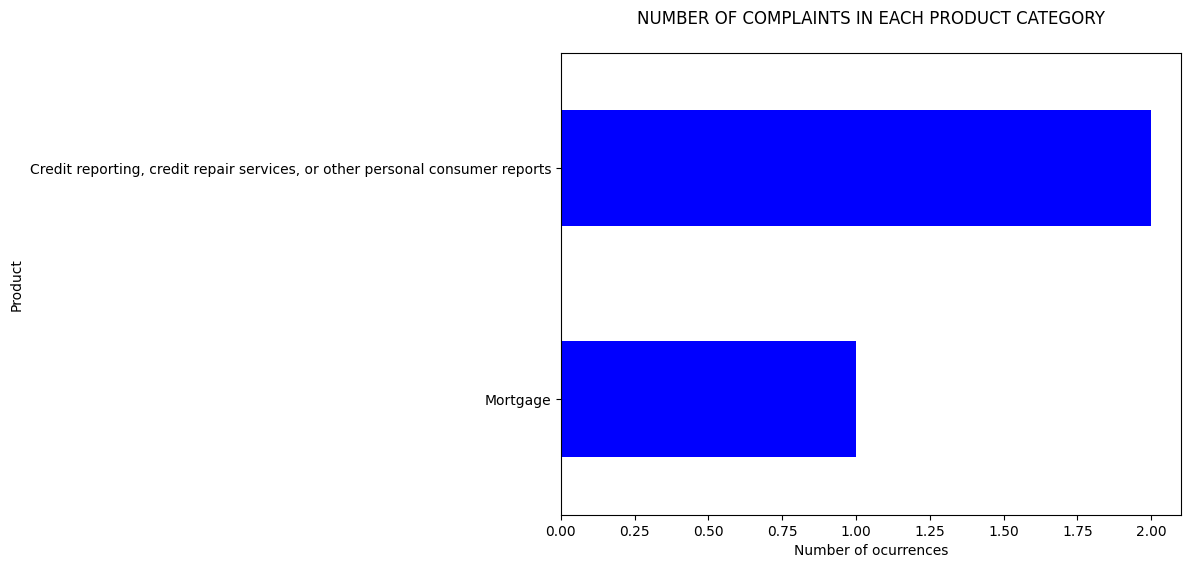

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df1.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color='Blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/connsumerComplaintsSmall.csv')
test_df.shape

(101, 7)

In [ ]:
test_df.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
df3 = test_df[['Product', 'Consumer complaint narrative']].copy()


df3 = df3[pd.notnull(df3['Consumer complaint narrative'])]


df3.columns = ['Product', 'Consumer_complaint']

df3.shape

(3, 2)

In [ ]:
pd.DataFrame(df3.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Mortgage']], dtype=object)

In [ ]:
df3.replace({'Product':
             {'Credit reporting, credit repair services, or other personal consumer reports':
              'Credit reporting, repair, or other',
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}},
            inplace= True)

In [ ]:
pd.DataFrame(df1.Product.unique())

0
0  Credit reporting, credit repair services, or o...
1                                           Mortgage

In [ ]:
df3.head()

Product  \
18   Credit reporting, repair, or other   
85                             Mortgage   
100  Credit reporting, repair, or other   

                                    Consumer_complaint  
18   I have filed multiple disputes with this compa...  
85   I have fully paid up my mortgage dues and Sele...  
100  My name is XXXX XXXX this complaint is not mad...

# **EMOTIONAL LABEL**

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/emotion-labels-test.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/drive/MyDrive/emotion-labels-train.csv",encoding="latin1")

In [5]:
data.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game â¤ï¸â¤ï...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [6]:
data.tail()

text    label
3608  @VivienLloyd Thank you so much! Just home - st...  sadness
3609  Just put the winter duvet on âï¸âï¸ð¬â...  sadness
3610  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness
3611  @BluesfestByron second artist announcement loo...  sadness
3612  I can literally eat creamy pesto pasta topped ...  sadness

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


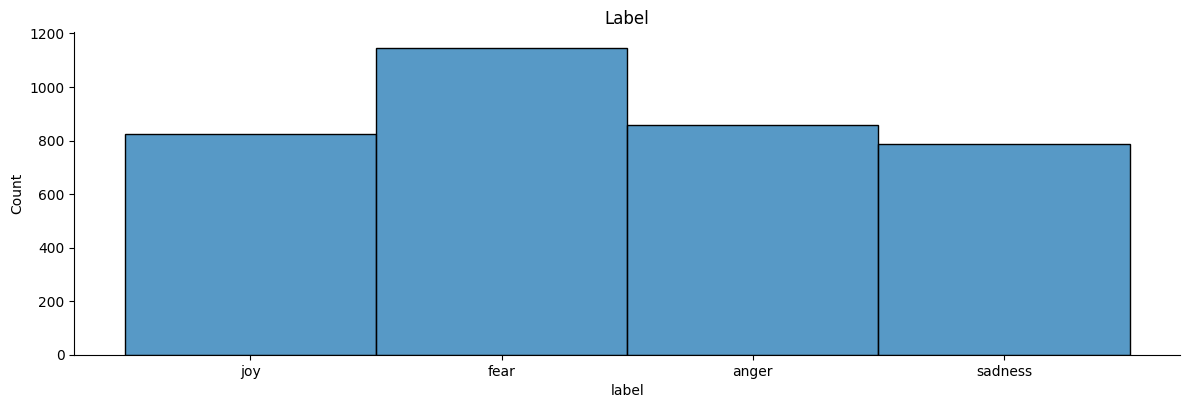

In [8]:
sns.displot(data.label, height=4, aspect=3)
plt.title('Label')
plt.show()

In [9]:
data.label = [0 if each == "joy"
              else
              1 if each == "fear"
              else
              2 if each == "anger"
              else 3
              for each in data.label]

In [10]:
import re
first_text = data.text[4]
text = re.sub("[^a-zA-Z]"," " ,first_text)

In [11]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

from nltk.corpus import stopwords
text = nltk.word_tokenize(text)
text = [word for word in text if not word in set(stopwords.words("english"))]

import nltk as nlp

text = " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
df_train = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')


In [16]:
df_full = pd.concat([df_train,df_test], axis = 0)
df_full

text    label
0     Just got back from seeing @GaryDelaney in Burs...      joy
1     Oh dear an evening of absolute hilarity I don'...      joy
2     Been waiting all week for this game ❤️❤️❤️ #ch...      joy
3     @gardiner_love : Thank you so much, Gloria! Yo...      joy
4     I feel so blessed to work with the family that...      joy
...                                                 ...      ...
3137          Why does Candice constantly pout #GBBO 💄😒  sadness
3138  @redBus_in #unhappy with #redbus CC, when I ta...  sadness
3139  @AceOperative789 no pull him afew weeks ago, s...  sadness
3140  I'm buying art supplies and I'm debating how s...  sadness
3141  @sainsburys Could you ask your Chafford Hundre...  sadness

[6755 rows x 2 columns]

In [19]:
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
